# 2022 NZMSA Data Science Submission.

In [37]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


# Exploratory Data Analysis.

In [38]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [39]:
#Showing the numerical values of:
#Average
#Standard deviation
#Percentile range: 25th and 75th

dataset.describe().loc[['mean','std','25%','75%']]

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN


In [40]:
#Checking for any null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


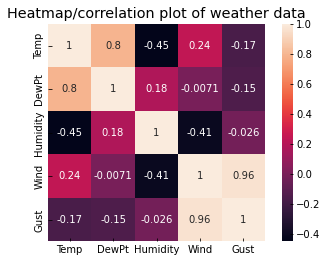

In [41]:
#Correlation plot
new_dataset = dataset.drop(['peak_wind_drct'], axis=1)
new_dataset.columns = ['Station', 'Valid', 'Temp', 'DewPt','Humidity','Wind','Gust']
ax = plt.axes()
sns.heatmap(new_dataset.corr(),square=True,annot=True, ax=ax)
ax.set_title('Heatmap/correlation plot of weather data')
plt.show()

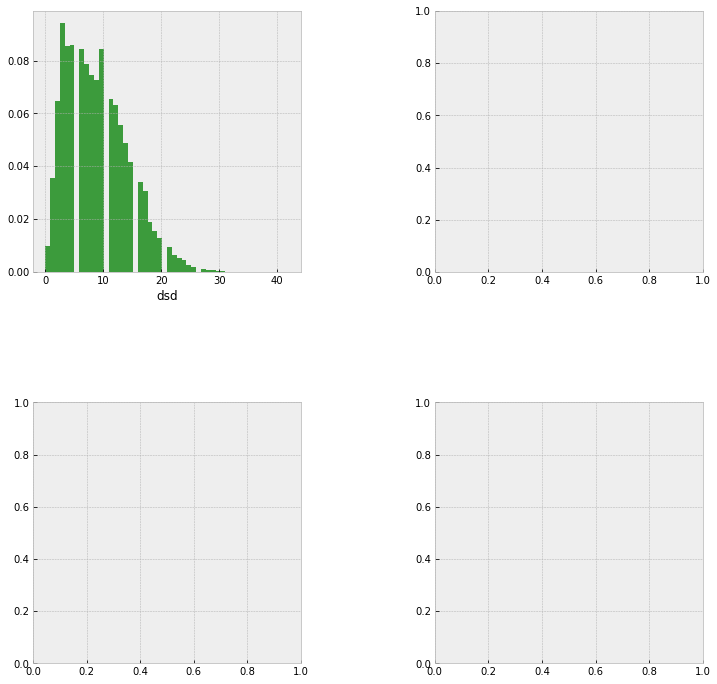

In [42]:
#commends on correlation plot:
figure, axis = plt.subplots(2,2, figsize =(12,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axis[0,0].hist(dataset['sknt'], 50, density=True, facecolor='g', alpha=0.75);
axis[0,0].set_xlabel("dsd");

# Data Processing

In [44]:
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [47]:
#Making the decision to drop both the gust and peak wind gust direction as there isn't
#sufficient data as shown by the low number of non-null counts. 
dataset.drop(columns=['gust', 'peak_wind_drct'], inplace=True)
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [63]:
#There were still some rows that contained null values for any of the given data types
#I decided to remove all rows that contained null values, as there weren't that many compared to the total sample size
dataset = dataset.dropna(axis=0, how='any')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    station  103584 non-null  object 
 1   valid     103584 non-null  object 
 2   tmpc      103584 non-null  float64
 3   dwpc      103584 non-null  float64
 4   relh      103584 non-null  float64
 5   sknt      103584 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.5+ MB


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, test_size = 0.2)

ValueError: not enough values to unpack (expected 4, got 2)

# Data Modelling

In [9]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.